#                                 Mini Project on Web Scraping

Group Name: ML CHAMPS

    Group Members: G Shilpa (2019AIML580), Ram Sharma (2019AIML622), Sree Ram (2019AIML576)

Web Scrapping:

Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites. Web scraping may access the World Wide Web directly using the Hypertext Transfer Protocol, or through a web browser. It is a form of copying, in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis.


The four tasks that will be done as a part of this mini project is follows:
 
    A. Data Acquisition  
    B. Data Cleaning 
    C. Data Integration 
    D. Exploratory Data Analysis and Recommendation

## Data Science Project Lifecycle

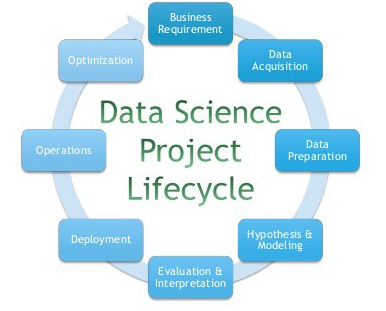

Data Acquisition - involves acquiring data from both internal and external sources, including social media or web scraping. In a steady state, data extraction and transfer routines would be in place, and new sources, once identified would be acquired following the established processes.

Data preparation - Usually referred to as "data wrangling", this step involves cleaning the data and reshaping it into a readily usable form for performing data science. This is similar to the traditional ETL steps in data warehousing in certain aspects, but involves more exploratory analysis and is primarily aimed at extracting features in usable formats.

Hypothesis and modeling are the traditional data mining steps - however in a data science project, these are not limited to statistical samples. Indeed the idea is to apply machine learning techniques to all data. A key sub-step is performed here for model selection. This involves the separation of a training set for training the candidate machine-learning models, and validation sets and test sets for comparing model performances and selecting the best performing model, gauging model accuracy and preventing over-fitting.

Steps 2 through 4 are repeated a number of times as needed; as the understanding of data and business becomes clearer and results from initial models and hypotheses are evaluated, further tweaks are performed. These may sometimes include Step 5 (deployment) and be performed in a pre-production or "limited" / "pilot" environment before the actual full-scale "production" deployment, or could include fast-tweaks after deployment, based on the continuous deployment model.
Once the model has been deployed in production, it is time for regular maintenance and operations. This operations phase could also follow a target DevOps model which gels well with the continuous deployment model, given the rapid time-to-market requirements in big data projects. Ideally, the deployment includes performance tests to measure model performance, and can trigger alerts when the model performance degrades beyond a certain acceptable threshold.


The optimization phase is the final step in the data science project life-cycle. This could be triggered by failing performance, or due to the need to add new data sources and retraining the model, or even to deploy improved versions of the model based on better algorithms

## (A)	DATA ACQUISITION 

e-commerce platforms Chosen are:
     >Following platforms have been chosen for scrapping
     - Big Basket (G Shilpa)
     - Jio Mart (Ram Sharma)
     - Amazon (sri Ram)

## Data Scrap from Big Basket

### Member 1: G Shilpa Id: 2019AIML580 ECommerce Website: Big Basket

First step is to import the neccessary libraries used in python

In [1]:
# scraping of Big Basket
import pandas as pd
from datetime import datetime
import re
import json
import io
import requests
from bs4 import BeautifulSoup 
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt

Below are the methods created for scraping the data from Big Basket

In [2]:
# this method returns json object of complete product list of Big Basket e-commerce website
def webscrapBigBasket(url):
    res = requests.get(url)
    data = json.loads(res.text)
    data = data['tab_info']['product_map']['all']['prods'] 
    data_len = len(data)
    return data

#Below method reads the json objects and extract the data required for this project
def readBBJson(jsonObj,category,filename):
    #print(jsonObj)
    data_len = len(jsonObj)
    #print(data_len)
    #data1 = "[]"
    #data2 = "[]"
    #data3 = "[]"
    for m in range (data_len):
              data1 = jsonObj[m]
              #print(data1)
              data2 = data1['all_prods']
              #scrap_record = ""
              if (len(data2)< 1):
                    name = data1['p_desc']
                    name = name.replace(', ', '') 
                    weight = data1['w']
                    mrp = data1['mrp']
                    sp = data1['sp']
                    offer = data1['dis_val']
                    vendor ='BigBasket'
                    scrap_record = str(name)+','+str(weight)+','+mrp+','+sp+','+str(vendor)+','+str(category)+'\n'
                    #print(scrap_record)
                    with io.open(filename,'a',encoding ='utf8') as f2:
                        f2.write(scrap_record)
                        f2.close()
              else:
                for k in range(len(data2)):
                    data3 = data2[k]
                    name = data3['p_desc']
                    name = name.replace(', ', '') 
                    weight = data3['w']
                    mrp = data3['mrp']
                    sp = data3['sp']
                    offer = data3['dis_val']
                    vendor ='BigBasket'
                    scrap_record = '"'+str(name)+'"'+','+str(weight)+','+mrp+','+sp+','+str(vendor)+','+str(category)+'\n'
                    #print(scrap_record)
                    with io.open(filename,'a',encoding ='utf8') as f2:
                        f2.write(scrap_record)
                        f2.close() 

In [3]:
# Fruits and Vegitables
with io.open('bbfruits.csv','w', encoding ='utf8') as f1:
    f1.write('Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category'+'\n')
    f1.close()

i = 1
while (i < 4):
    i=i+1
    url = 'https://www.bigbasket.com/product/get-products/?slug=fruits-vegetables&page='+str(i)+'&tab_type=["all"]&sorted_on=popularity&listtype=pc'
    #jsonObj = webscrapBigBasket('https://www.bigbasket.com/product/get-products/?slug=fruits-vegetables&page=2&tab_type=["all"]&sorted_on=popularity&listtype=pc')
    jsonObj = webscrapBigBasket(url)
    filename = 'bbfruits.csv'
    readBBJson(jsonObj,'FruitsAndVegitables',filename)
    

In [4]:
bbfruits = pd.read_csv('bbfruits.csv')
bbfruits.head(10)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
0,Cabbage,1 pc,23.75,19.0,BigBasket,FruitsAndVegitables
1,Ridge Gourd/Beerakaya,500 g,37.50,30.0,BigBasket,FruitsAndVegitables
2,Ridge Gourd/Beerakaya,1 kg,73.75,59.0,BigBasket,FruitsAndVegitables
3,Coriander Leaves/Kothimeera,100 g,37.50,30.0,BigBasket,FruitsAndVegitables
4,Coriander Leaves/Kothimeera,250 g,93.75,75.0,BigBasket,FruitsAndVegitables
5,Coriander Leaves/Kothimeera,1 kg,373.75,299.0,BigBasket,FruitsAndVegitables
6,Mosambi - Economy,3 kg,123.75,99.0,BigBasket,FruitsAndVegitables
7,Muskmelon - Netted Small/Kharbuja,1 pc,53.75,43.0,BigBasket,FruitsAndVegitables
8,Apple - Red Delicious/WashingtonRegular,4 pcs,198.75,159.0,BigBasket,FruitsAndVegitables
9,Beetroot,500 g,27.50,22.0,BigBasket,FruitsAndVegitables


In [5]:
# dals and pulses
with io.open('bbdals.csv','w', encoding ='utf8') as f1:
    f1.write('Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category'+'\n')
    f1.close()

i = 1
while (i < 4):
    i=i+1
    url = 'https://www.bigbasket.com/product/get-products/?slug=dals-pulses&page='+str(i)+'&tab_type=["all"]&sorted_on=popularity&listtype=pc'
    jsonObj = webscrapBigBasket(url)
    #print(jsonObj1)
    filename = 'bbdals.csv'
    readBBJson(jsonObj,'DalsAndPulses',filename) 

In [6]:
bbdals = pd.read_csv('bbdals.csv')
bbdals.head(10)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
0,bb Royal Idli Rice 5kg + Gota Urad 1kg + Raw P...,Combo,615.0,453.0,BigBasket,DalsAndPulses
1,Soya Chunks,500 g,70.0,68.0,BigBasket,DalsAndPulses
2,Soya - Chunks,200 g,32.0,30.0,BigBasket,DalsAndPulses
3,Organic - Brown Chana/Channa Brown,1 kg,160.0,110.0,BigBasket,DalsAndPulses
4,Organic - Brown Chana / Sengalu,500 g,82.0,58.0,BigBasket,DalsAndPulses
5,Organic - Brown Channa / Sengalu,200 g,32.0,24.0,BigBasket,DalsAndPulses
6,Organic - Brown Chana/Channa Brown,2 kg,319.0,219.0,BigBasket,DalsAndPulses
7,Channa - Brown,1 kg,140.0,78.0,BigBasket,DalsAndPulses
8,Channa - Brown,200 g,30.0,17.0,BigBasket,DalsAndPulses
9,Channa - Brown,500 g,70.0,42.0,BigBasket,DalsAndPulses


In [7]:
#Biscuits and cookies
with io.open('bbbiscuits.csv','w', encoding ='utf8') as f1:
    f1.write('Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category'+'\n')
    f1.close()

i = 1
while (i < 4):
    i=i+1
    url = 'https://www.bigbasket.com/product/get-products/?slug=biscuits-cookies&page='+str(i)+'&tab_type=["all"]&sorted_on=popularity&listtype=pc'
    jsonObj = webscrapBigBasket(url)
    #print(jsonObj1)
    filename = 'bbbiscuits.csv'
    readBBJson(jsonObj,'BiscuitsAndCookies',filename)

In [8]:
bbbiscuits = pd.read_csv('bbbiscuits.csv')
bbbiscuits.head(10)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
0,Moms Magic Cookies - Cashew & Almond Biscuits,60 g,10.0,10.0,BigBasket,BiscuitsAndCookies
1,Biscuits - Chand,400 g,160.0,160.0,BigBasket,BiscuitsAndCookies
2,Good Day Butter Cookies,75 g,10.0,10.0,BigBasket,BiscuitsAndCookies
3,Kitkat Mini 2 Finger Chocolate Covered Wafer,13.2 g,10.0,10.0,BigBasket,BiscuitsAndCookies
4,Kitkat 2 Finger Chocolate Covered Wafer Bar,18 g,15.0,15.0,BigBasket,BiscuitsAndCookies
5,Good Day Chocochip Cookies,56 g,10.0,10.0,BigBasket,BiscuitsAndCookies
6,Hide & Seek Caffe Mocha Cookies,120 g,28.0,28.0,BigBasket,BiscuitsAndCookies
7,Digestive Biscuits,100 g,20.0,20.0,BigBasket,BiscuitsAndCookies
8,Treat - Orange Biscuits,6x60 g,60.0,60.0,BigBasket,BiscuitsAndCookies
9,Treat Orange Cream Biscuits,60 g,10.0,10.0,BigBasket,BiscuitsAndCookies


In [9]:
#Bath and handwash
with io.open('bbhandwash.csv','w', encoding ='utf8') as f1:
    f1.write('Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category'+'\n')
    f1.close()

i = 1
while (i < 4):
    i=i+1
    url = 'https://www.bigbasket.com/product/get-products/?slug=bath-hand-wash&page='+str(i)+'&tab_type=["all"]&sorted_on=popularity&listtype=pc'
    jsonObj = webscrapBigBasket(url)
    #print(jsonObj1)
    filename = 'bbhandwash.csv'
    readBBJson(jsonObj,'BathAndHandWash',filename)

In [10]:
bbhandwash = pd.read_csv('bbhandwash.csv')
bbhandwash.head(10)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
0,Bathing Soap - Soft & Fresh,125 g,180.0,141.75,BigBasket,BathAndHandWash
1,Hand Wash Liquid Refill - Skincare,900 ml,149.0,149.00,BigBasket,BathAndHandWash
2,Anti-Bacterial Hand Sanitiser,200 ml,100.0,96.00,BigBasket,BathAndHandWash
3,Anti-Bacterial Hand Sanitiser,5 L,2500.0,2250.00,BigBasket,BathAndHandWash
4,Anti-Bacterial Hand Sanitizer,50 ml,25.0,24.00,BigBasket,BathAndHandWash
5,Anti-Bacterial Hand Sanitizer,100 ml,50.0,48.00,BigBasket,BathAndHandWash
6,Masterblaster Germ Protection Liquid Handwash ...,1.5 L,220.0,187.00,BigBasket,BathAndHandWash
7,Bathing Soap - Ayurvedic Classic 18 Herbs,125 g,105.0,105.00,BigBasket,BathAndHandWash
8,Hand Sanitizer,100 ml,50.0,50.00,BigBasket,BathAndHandWash
9,Hand Sanitizer,60 ml,30.0,30.00,BigBasket,BathAndHandWash


Merging all the Big Basket products

In [11]:
bbdf = pd.concat([bbfruits,bbdals,bbbiscuits, bbhandwash], ignore_index=True)
#df = pd.concat([dataset, dataset1,dataset2])

In [12]:
bbdf.tail(5)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
412,Dreamflower Fragrant Talc,200 g,180.0,180.00,BigBasket,BathAndHandWash
413,Ayurveda Handmade Soap,125 g,129.0,118.68,BigBasket,BathAndHandWash
414,Ayurveda Handmade Soap Pack of 3 - Get 75 gm Free,2x125 g,258.0,225.49,BigBasket,BathAndHandWash
415,Hand Sanitizer,50 ml,25.0,25.00,BigBasket,BathAndHandWash
416,Shower Gel - Lemon & Oil Body WashWomen,250 ml,199.0,169.15,BigBasket,BathAndHandWash


In [13]:
# Checking the length of the data set
len(bbdf)

417

In [14]:
# Check the data types of the dataset bbdf
bbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      417 non-null    object 
 1   Product_Quantity  417 non-null    object 
 2   MRP_Price         417 non-null    float64
 3   Offer_Price       417 non-null    float64
 4   Vendor            417 non-null    object 
 5   Category          417 non-null    object 
dtypes: float64(2), object(4)
memory usage: 19.7+ KB


In [15]:
bbdf.tail(10)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
407,Ponds Starlight Talc,100 g,99.0,99.00,BigBasket,BathAndHandWash
408,Deeply Nourishing Body Wash,190 ml,115.0,115.00,BigBasket,BathAndHandWash
409,Shower Gel - AromaAbsolute Relax,750 ml,380.0,323.00,BigBasket,BathAndHandWash
410,Original Soap,75 g,128.0,128.00,BigBasket,BathAndHandWash
411,Dreamflower Fragrant Talc,50 g,45.0,45.00,BigBasket,BathAndHandWash
412,Dreamflower Fragrant Talc,200 g,180.0,180.00,BigBasket,BathAndHandWash
413,Ayurveda Handmade Soap,125 g,129.0,118.68,BigBasket,BathAndHandWash
414,Ayurveda Handmade Soap Pack of 3 - Get 75 gm Free,2x125 g,258.0,225.49,BigBasket,BathAndHandWash
415,Hand Sanitizer,50 ml,25.0,25.00,BigBasket,BathAndHandWash
416,Shower Gel - Lemon & Oil Body WashWomen,250 ml,199.0,169.15,BigBasket,BathAndHandWash


In [16]:
bbdf.groupby(['Category','Product_Name']).sum()

MRP_Price  \
Category            Product_Name                                                    
BathAndHandWash     Almond & Rose Soap                                      30.00   
                    Anti-Bacterial Hand Sanitiser                         2600.00   
                    Anti-Bacterial Hand Sanitizer                           75.00   
                    Antibacterial Hand Sanitizer - 72% Alcohol Base...     250.00   
                    Ayurveda Handmade Soap                                 129.00   
...                                                                           ...   
FruitsAndVegitables Ridge Gourd/Beerakaya                                  111.25   
                    Snake Gourd/Potlakaya                                   25.00   
                    Sweet Potato/Chilakada Dumpa                            48.75   
                    Tomato - Hybrid/Bengaluru Tamata                        31.25   
                    Totapuri Mango                                          68.75   

                                                                        Offer_Price  
Category            Product_Name                                                     
BathAndHandWash     Almond & Rose Soap                                        30.00  
                    Anti-Bacterial Hand Sanitiser                           2346.00  
                    Anti-Bacterial Hand Sanitizer                             72.00  
                    Antibacterial Hand Sanitizer - 72% Alcohol Base...       250.00  
                    Ayurveda Handmade Soap                                   118.68  
...                                                                             ...  
FruitsAndVegitables Ridge Gourd/Beerakaya                                     89.00  
                    Snake Gourd/Potlakaya                                     20.00  
                    Sweet Potato/Chilakada Dumpa                              39.00  
                    Tomato - Hybrid/Bengaluru Tamata                          25.00  
                    Totapuri Mango                                            55.00  

[283 rows x 2 columns]

In [17]:
bbdf.tail(20)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
397,Hand Wash - Mild,215 ml,99.0,99.00,BigBasket,BathAndHandWash
398,Hand Sanitizer,5 L,2450.0,1960.00,BigBasket,BathAndHandWash
399,Shower Gel - Pure Impact Body WashMen,250 ml,199.0,175.12,BigBasket,BathAndHandWash
400,Shower Gel - Pure Impact Body WashMen,500 ml,349.0,279.20,BigBasket,BathAndHandWash
401,Shower Gel - Active Clean Body WashMen,250 ml,199.0,169.15,BigBasket,BathAndHandWash
402,Gel Bathing Bar - Multi Variant (Buy 4 & Get 1...,2x625 g,480.0,480.00,BigBasket,BathAndHandWash
403,Gel Bathing Bar - Multi Variant,125 g,240.0,240.00,BigBasket,BathAndHandWash
404,Cool Bath Soap - 99.9% Germ Protection,100 g,280.0,246.40,BigBasket,BathAndHandWash
405,Hand Wash - Nature Germ Protection,2x750 ml,238.0,198.00,BigBasket,BathAndHandWash
406,Hand Wash - Nature Germ Protection,750 ml,119.0,99.00,BigBasket,BathAndHandWash


### Data Scraping from Jio Mart

### Member 2: Ram Sharma Id: 2019AIML622 ECommerce Website: Jio Mart

In [18]:
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import pandas as pd

In [19]:
# Method to web scrap product data from Jio Mart

In [20]:
def webScrapJioMart(url,category,filename):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    #print(soup.prettify())
    result = soup.find_all(attrs={'class': 'row product-list'})
    for job_elem in result:
        category_items = job_elem.find_all('div',{'class':'cat-item'})
        for elem1 in category_items:
            prod_name = elem1.find('span',class_='clsgetname').get_text()
            prod_name = prod_name.replace(', ', '') 
            final_price = elem1.find('span',class_='price-box').span.get_text()
            try:
                mrp_price = elem1.find('span',class_='price-box').strike.get_text()
            except:
                mrp_price = 'None'
            manufacturer = elem1.find('span',class_='drug-varients ellipsis').get_text()
            product_id = elem1.find('form',class_='cart-form').button['data-sku']
            quantity = elem1.find('form',class_='cart-form').input['value']
            vendor ='JioMart'
            try:
                discount = elem1.find('span',class_='dis_section').get_text()
            except:
                discount = 'None'
              
            with io.open(filename,'a', encoding ='utf8') as f2:
                f2.write(prod_name+','+quantity +','+mrp_price+','+final_price+','+vendor+','+category+'\n')
                f2.close()
   

In [21]:
# dals and pulses
with io.open('jiomartdals.csv','w', encoding ='utf8') as f1:
    f1.write('Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category'+'\n')
    f1.close()

filename = 'jiomartdals.csv'

i=1
while (i < 4):
    i=i+1
    url = 'https://www.jiomart.com/category/staples/dals-pulses/page/'+str(i)+''
    webScrapJioMart(url,'DalsAndPulses',filename)
    


In [22]:
jiomartdals = pd.read_csv('jiomartdals.csv')
jiomartdals.head(10)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
0,Loose Moong Dal 1 kg,1,₹ 132.00,₹ 126.00,JioMart,DalsAndPulses
1,Good Life Chana Brown 500 g,1,₹ 47.00,₹ 36.00,JioMart,DalsAndPulses
2,Good Life Toor Dal 500 g,1,₹ 70.00,₹ 56.00,JioMart,DalsAndPulses
3,Chana Dal 2 kg,1,₹ 180.00,₹ 122.00,JioMart,DalsAndPulses
4,Good Life Moong Dal 500 g,1,₹ 92.00,₹ 70.00,JioMart,DalsAndPulses
5,Good Life Masoor Dal 500 g,1,₹ 62.00,₹ 55.00,JioMart,DalsAndPulses
6,Good Life Moong Dal 1 kg,1,₹ 182.00,₹ 139.00,JioMart,DalsAndPulses


In [23]:
# fruits and vegitables
with io.open('jiomartfruits.csv','w', encoding ='utf8') as f1:
    f1.write('Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category'+'\n')
    f1.close()

filename = 'jiomartfruits.csv'
url = 'https://www.jiomart.com/category/fruits-vegetables/fresh-fruits'
webScrapJioMart(url,'FruitsAndVegitables',filename)
jiomartfruits = pd.read_csv('jiomartfruits.csv')
jiomartfruits.head(10)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
0,Apple Red 6 pcs (Pack),1,None,₹ 149.00,JioMart,FruitsAndVegitables
1,Dates Imported 400 g (Pack),1,None,₹ 149.00,JioMart,FruitsAndVegitables
2,Orange Imported 1 kg,1,None,₹ 159.00,JioMart,FruitsAndVegitables
3,Pomegranate Kesar 1 kg,1,None,₹ 125.00,JioMart,FruitsAndVegitables
4,Mango Badami 1 Kg,1,None,₹ 98.00,JioMart,FruitsAndVegitables
5,Musk Melon 1 kg,1,None,₹ 29.00,JioMart,FruitsAndVegitables
6,Mango Alphanso 1/2 Dozen (Mumbai/Pune only),1,None,₹ 289.00,JioMart,FruitsAndVegitables
7,Mosambi 1 kg,1,None,₹ 49.00,JioMart,FruitsAndVegitables
8,Pineapple Queen 1 pc,1,None,₹ 69.00,JioMart,FruitsAndVegitables
9,Watermelon Kiran 2.5 kg,1,None,₹ 47.50,JioMart,FruitsAndVegitables


In [24]:
# fruits and vegitables
with io.open('jiomartvegs.csv','w', encoding ='utf8') as f1:
    f1.write('Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category'+'\n')
    f1.close()

filename = 'jiomartvegs.csv'
url = 'https://www.jiomart.com/category/fruits-vegetables/fresh-vegetables'
webScrapJioMart(url,'FruitsAndVegitables',filename)
jiomartvegs = pd.read_csv('jiomartvegs.csv')
jiomartvegs.head(10)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
0,Lauki (Bottle Gourd) 1 kg,1,None,₹ 34.00,JioMart,FruitsAndVegitables
1,Green Capsicum 500 g,1,None,₹ 47.50,JioMart,FruitsAndVegitables
2,Potato 1 kg (Pack),1,None,₹ 22.00,JioMart,FruitsAndVegitables
3,Bitter Gourd 1 Kg,1,None,₹ 49.00,JioMart,FruitsAndVegitables
4,Cabbage 1 pc,1,None,₹ 30.00,JioMart,FruitsAndVegitables
5,Cucumber Keera- Kg,1,None,₹ 59.00,JioMart,FruitsAndVegitables
6,Carrot Regular 1 kg,1,None,₹ 49.00,JioMart,FruitsAndVegitables
7,Pumpkin Slice 1 Kg,1,None,₹ 14.00,JioMart,FruitsAndVegitables
8,Raw Mango 1 kg,1,None,₹ 39.00,JioMart,FruitsAndVegitables
9,Tomato 1 kg,1,None,₹ 39.00,JioMart,FruitsAndVegitables


In [25]:
#biscuits and cookies
with io.open('jiomartbiscuits.csv','w', encoding ='utf8') as f1:
    f1.write('Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category'+'\n')
    f1.close()

filename = 'jiomartbiscuits.csv'
url = 'https://www.jiomart.com/category/snacks-branded-foods/biscuits-cookies'
webScrapJioMart(url,'BiscuitsAndCookies',filename)
jiomartbiscuits = pd.read_csv('jiomartbiscuits.csv')
jiomartbiscuits.head(10)




,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
0,Dukes Masala Nibbles 150 g,1,₹ 50.00,₹ 35.00,JioMart,BiscuitsAndCookies
1,Dukes Waffy Strawberry Flavoured Wafers 75 g,1,₹ 45.00,₹ 22.50,JioMart,BiscuitsAndCookies
2,Sunfeast Dark Fantasy Choco Fills Cookies 75 g,1,₹ 30.00,₹ 25.00,JioMart,BiscuitsAndCookies
3,Britannia Good Day Cashew Cookies 200 g,1,₹ 35.00,₹ 28.00,JioMart,BiscuitsAndCookies
4,Cadbury Oreo Chocolate Cream Biscuits 120 g,1,₹ 30.00,₹ 27.00,JioMart,BiscuitsAndCookies
5,Britannia Good Day Choco Chip Cookies 100 g,1,₹ 30.00,₹ 20.00,JioMart,BiscuitsAndCookies
6,Parle Hide & Seek Chocolate Chip Cookies 100 g,1,₹ 30.00,₹ 27.00,JioMart,BiscuitsAndCookies
7,Parle Monaco Classic Regular Salted Biscuits 4...,1,₹ 60.00,₹ 49.00,JioMart,BiscuitsAndCookies
8,Parle Krack Jack Biscuits 400 g,1,₹ 60.00,₹ 49.00,JioMart,BiscuitsAndCookies
9,Britannia Good Day Cashew Cookies 100 g,1,₹ 20.00,₹ 15.00,JioMart,BiscuitsAndCookies


In [26]:
# bath and handwash
with io.open('jiomartbath.csv','w', encoding ='utf8') as f1:
    f1.write('Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category'+'\n')
    f1.close()

filename = 'jiomartbath.csv'
url = 'https://www.jiomart.com/category/personal-care/bath-hand-wash'
webScrapJioMart(url,'BathAndHandWash',filename)
jiomartbath = pd.read_csv('jiomartbath.csv')
jiomartbath.head(10)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
0,Lifebuoy Immunity Boosting Total 10 Hand Sanit...,1,₹ 25.00,₹ 23.25,JioMart,BathAndHandWash
1,FRSH Instant Advanced Hand Sanitizer 500ml,1,₹ 250.00,₹ 232.50,JioMart,BathAndHandWash
2,FRSH Instant Advanced Hand Sanitizer 100ml,1,₹ 50.00,₹ 46.50,JioMart,BathAndHandWash
3,Lifebuoy Total 10 Soap 125 g (Pack of 4),1,₹ 85.00,₹ 79.05,JioMart,BathAndHandWash
4,Lux Soft Touch Bar Soap 150 g (Pack of 3),1,₹ 114.00,₹ 94.00,JioMart,BathAndHandWash
5,Dettol Original Soap 125 g (Buy 4 Get 1 Free),1,₹ 200.00,₹ 180.00,JioMart,BathAndHandWash
6,Medimix Ayurvedic 18-Herbs Classic Soap 125 g ...,1,₹ 105.00,₹ 94.00,JioMart,BathAndHandWash
7,Godrej No.1 Lime & Aloe Vera Soap 100 g (Buy 4...,1,₹ 76.00,₹ 70.68,JioMart,BathAndHandWash
8,Dettol Original Liquid Hand Wash 200 ml (Get F...,1,₹ 99.00,₹ 92.07,JioMart,BathAndHandWash
9,Pears Pure & Gentle Soap with Natural Oils 125...,1,₹ 150.00,₹ 114.00,JioMart,BathAndHandWash


In [27]:
# combining all jip mart products
jiodf = pd.concat([jiomartdals,jiomartvegs,jiomartbiscuits, jiomartbath], ignore_index=True)

In [28]:
jiodf

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
0,Loose Moong Dal 1 kg,1,₹ 132.00,₹ 126.00,JioMart,DalsAndPulses
1,Good Life Chana Brown 500 g,1,₹ 47.00,₹ 36.00,JioMart,DalsAndPulses
2,Good Life Toor Dal 500 g,1,₹ 70.00,₹ 56.00,JioMart,DalsAndPulses
3,Chana Dal 2 kg,1,₹ 180.00,₹ 122.00,JioMart,DalsAndPulses
4,Good Life Moong Dal 500 g,1,₹ 92.00,₹ 70.00,JioMart,DalsAndPulses
5,Good Life Masoor Dal 500 g,1,₹ 62.00,₹ 55.00,JioMart,DalsAndPulses
6,Good Life Moong Dal 1 kg,1,₹ 182.00,₹ 139.00,JioMart,DalsAndPulses
7,Lauki (Bottle Gourd) 1 kg,1,None,₹ 34.00,JioMart,FruitsAndVegitables
8,Green Capsicum 500 g,1,None,₹ 47.50,JioMart,FruitsAndVegitables
9,Potato 1 kg (Pack),1,None,₹ 22.00,JioMart,FruitsAndVegitables


In [29]:
qty_df = jiodf.Product_Name.str.extract('(\d+)')
jiodf['Product_Quantity'] = qty_df

In [30]:
jiodf

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
0,Loose Moong Dal 1 kg,1,₹ 132.00,₹ 126.00,JioMart,DalsAndPulses
1,Good Life Chana Brown 500 g,500,₹ 47.00,₹ 36.00,JioMart,DalsAndPulses
2,Good Life Toor Dal 500 g,500,₹ 70.00,₹ 56.00,JioMart,DalsAndPulses
3,Chana Dal 2 kg,2,₹ 180.00,₹ 122.00,JioMart,DalsAndPulses
4,Good Life Moong Dal 500 g,500,₹ 92.00,₹ 70.00,JioMart,DalsAndPulses
5,Good Life Masoor Dal 500 g,500,₹ 62.00,₹ 55.00,JioMart,DalsAndPulses
6,Good Life Moong Dal 1 kg,1,₹ 182.00,₹ 139.00,JioMart,DalsAndPulses
7,Lauki (Bottle Gourd) 1 kg,1,None,₹ 34.00,JioMart,FruitsAndVegitables
8,Green Capsicum 500 g,500,None,₹ 47.50,JioMart,FruitsAndVegitables
9,Potato 1 kg (Pack),1,None,₹ 22.00,JioMart,FruitsAndVegitables


In [31]:
jiodf.head(10)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
0,Loose Moong Dal 1 kg,1,₹ 132.00,₹ 126.00,JioMart,DalsAndPulses
1,Good Life Chana Brown 500 g,500,₹ 47.00,₹ 36.00,JioMart,DalsAndPulses
2,Good Life Toor Dal 500 g,500,₹ 70.00,₹ 56.00,JioMart,DalsAndPulses
3,Chana Dal 2 kg,2,₹ 180.00,₹ 122.00,JioMart,DalsAndPulses
4,Good Life Moong Dal 500 g,500,₹ 92.00,₹ 70.00,JioMart,DalsAndPulses
5,Good Life Masoor Dal 500 g,500,₹ 62.00,₹ 55.00,JioMart,DalsAndPulses
6,Good Life Moong Dal 1 kg,1,₹ 182.00,₹ 139.00,JioMart,DalsAndPulses
7,Lauki (Bottle Gourd) 1 kg,1,None,₹ 34.00,JioMart,FruitsAndVegitables
8,Green Capsicum 500 g,500,None,₹ 47.50,JioMart,FruitsAndVegitables
9,Potato 1 kg (Pack),1,None,₹ 22.00,JioMart,FruitsAndVegitables


## Scrap data from Amazon, Dmart

### Member 3: Sri Ram Hari Id: 2019AIML576 ECommerce Website: Amazon

In [59]:
import requests # required for HTTP requests: pip install requests
from bs4 import BeautifulSoup # required for HTML and XML parsing                                                              # required for HTML and XML parsing: pip install beautifulsoup4
import pandas as pd # required for getting the data in dataframes : pip install pandas
import time # to time the requests
from multiprocessing import Process, Queue, Pool
import threading
import sys

In [60]:
startTime = time.time()
qcount = 0 # the count in queue used to track the elements in queue
products=[] # List to store name of the product
prices=[] # List to store price of the product
ratings=[] # List to store ratings of the product
no_pages = 9 # no of pages to scrape in the website (provide it via arguments)

In [61]:
def scrap_amazon():
    fruits_1 ="Fruits|https://www.amazon.in/s?i=grocery&rh=n%3A4859730031&brr=1&qid=1590908038&rd=1&ref=sr_pg_1"
    fruits_2 = "Fruits|https://www.amazon.in/s?i=grocery&rh=n%3A4859730031&page=2&brr=1&qid=1590923241&rd=1&ref=sr_pg_2"
    fruits_3 ="Fruits|https://www.amazon.in/s?i=grocery&rh=n%3A4859730031&page=3&brr=1&qid=1590923274&rd=1&ref=sr_pg_3"
    veg_1 ="Vegtables|https://www.amazon.in/s?i=grocery&rh=n%3A4859731031&brr=1&qid=1590923340&rd=1&ref=sr_pg_1"
    veg_2 ="Vegtables|https://www.amazon.in/s?i=grocery&rh=n%3A4859731031&page=2&brr=1&qid=1590923340&rd=1&ref=sr_pg_2"
    veg_3 ="Vegtables|https://www.amazon.in/s?i=grocery&rh=n%3A4859731031&page=3&brr=1&qid=1590923377&rd=1&ref=sr_pg_3"
    pulses_1 = "Pulses|https://www.amazon.in/Dals-Pulses-Indian-Rice-Flour/s?i=grocery&rh=n%3A4859614031%2Cp_n_cuisinebin%3A4868228031&qid=1590919781&ref=sr_pg_1"
    pulses_2 = "Pulses|https://www.amazon.in/Dals-Pulses-Indian-Rice-Flour/s?i=grocery&rh=n%3A4859614031%2Cp_n_cuisinebin%3A4868228031&page=2&qid=1590923434&ref=sr_pg_2"
    pulses_3 = "Pulses|https://www.amazon.in/Dals-Pulses-Indian-Rice-Flour/s?i=grocery&rh=n%3A4859614031%2Cp_n_cuisinebin%3A4868228031&page=3&qid=1590923443&ref=sr_pg_3" 
    count  = 0
    data =[]
    urlInfos = [fruits_1,fruits_2,fruits_3,veg_1, veg_2, veg_3, pulses_1, pulses_2, pulses_3]
    for info in urlInfos:
        category, url = info.split("|")
        headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate",     "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
        r = requests.get(url, headers=headers)
        content = r.content
        soup = BeautifulSoup(content)
        for d in soup.findAll('div', attrs={'class':'a-section a-spacing-medium'}):
            temp_list =[]
            name = d.find('span', attrs={'class':'a-size-base-plus a-color-base a-text-normal'})
            price = d.find('span', attrs={'class':'a-price-whole'})
            mrp = extract_mrp(d)
            rating = d.find('span', attrs={'class':'a-icon-alt'})
            temp_list.append(text(name))
            temp_list.append(text(price))
            temp_list.append(mrp)
            temp_list.append(category)
            temp_list.append('Amazon')
            data.append(temp_list)
    return data 

def text(data):
    return data.text if data is not None else None
    
def extract_rating(data):
    return data.replace("out of 5 stars", "") if data is not None else None  
    
def extract_mrp(d):
    if d.find('span', attrs={'class':'a-price a-text-price'}) is not None and d.find('span', attrs={'class':'a-price a-text-price'}) \
                .find('span', attrs={'class':'a-offscreen'}) is not None:
        return text(d.find('span', attrs={'class':'a-price a-text-price'}) \
                .find('span', attrs={'class':'a-offscreen'})).replace("₹", "")
    else:
        return None
       
def extract_weight(d):
    if d is not None:
        pro = d.split(",")
        if(len(pro) > 1):
            return pro[1]
    else:
        return None
    
def extract_product_name(d):
    if d is not None:
        pro = d.split(",")
        if(len(pro) > 1):
            return pro[0]
    else:
        return 0

data = scrap_amazon()

# Create the pandas DataFrame  
amazon_df = pd.DataFrame(data, columns = ['Product', 'Offer_Price', 'MRP_Price', 'Category', 'Vendor'])
amazon_df['Product_Quantity'] = amazon_df['Product'].apply(lambda s: extract_weight(s))
amazon_df['Product_Name'] = amazon_df['Product'].apply(lambda s: extract_product_name(s))
amazon_df.drop(['Product'], axis=1, inplace=True)
amazon_df = amazon_df[['Product_Name', 'Product_Quantity', 'Offer_Price',  'MRP_Price', 'Category', 'Vendor']]
amazon_df = amazon_df[~amazon_df['Product_Quantity'].isnull()]
print(amazon_df)

                                          Product_Name  Product_Quantity  \
0                  D'nature Fresh Natural Blue Berries          250 Gram   
1                                 Fresh Banana Robusta             500 g   
2                            Fresh Water Melon - Kiran              1 Pc   
3                                         Fresh Papaya           1 Piece   
5                                      Fresh Mango Raw             500 g   
..                                                 ...               ...   
214                Natureland Organics Rajma Red Pouch         2 x 500 g   
218               B&B Organics Brown Horse Gram Kulthi              3 KG   
222  FARMUP Masoor Dal - 1 Kg (Unpolished) | High P...   Premium Quality   
225               B&B Organics Brown Horse Gram Kulthi             500 g   
233               B&B Organics Brown Horse Gram Kulthi              2 KG   

    Offer_Price MRP_Price Category  Vendor  
0           530       799   Fruits  Amazon

In [62]:
amazon_df.to_csv('amazon.csv', index=False,encoding='utf-8')

## Web Scrap Dmart:

In [63]:
import requests # required for HTTP requests: pip install requests
from bs4 import BeautifulSoup # required for HTML and XML parsing                                                              # required for HTML and XML parsing: pip install beautifulsoup4
import pandas as pd # required for getting the data in dataframes : pip install pandas
import time # to time the requests
from multiprocessing import Process, Queue, Pool
import threading
import sys

In [64]:
#Fetch Dmart Data
def webscrapDmart(url,category):
    #url = "https://dmart.in/dal-pulses-1"
    headers = requests.utils.default_headers()
    req = requests.get(url, headers)
    soup = BeautifulSoup(req.content, 'lxml')
    #print(soup.prettify())
    match = soup.find_all('a')
    #print(match)
    len(match)
    for i in range(len(match)):
        tag = soup.find_all("a")[i].attrs
        #print(tag)
        len(tag)
        #match = soup.find_all("div",class_ = [""])
        mydivs = soup.find_all("div", class_="hide prod_skuCntr")
        #print(mydivs)
        match = soup.find_all("div", class_="hide prod_skuCntr")
        #match = soup.hide prod_skuCntr
    myData = []
    for match in match:        
        data = json.loads(match.text)       
        data_len = len(data)        
        #with io.open('Dmart_pulses1.csv','w', encoding ='utf8') as f1:
        for k in range(data_len):
            #sku = str(data[k].get('skuUniqueID'))
            name = str(data[k].get('name'))
            name = name.split(':')[0]
            name = name.replace(',','')
            weight = str(data[k].get('name'))
            weight = weight.split(':')[1]
            MRP = str(data[k].get('price_MRP'))
            sp = str(data[k].get('price_SALE'))
            #offer = str(data[k].get('save_price'))
            vendor ='Dmart'
            #myData.append([category,sku, name,weight,MRP, sp,offer,source])
            myData.append([name,weight, MRP,sp,vendor,category])
    df = pd.DataFrame(myData, columns=['Product_Name','Product_Quantity', 'MRP_Price','Offer_Price', 'Vendor', 'Category'])
    len(df)
    return df

In [65]:
dmartdals = webscrapDmart('https://dmart.in/dal-pulses-1','DalsAndPulses')
dmartdals.to_csv('Dmartdal.csv', sep=',', index=False)

In [66]:
dmartpulses = webscrapDmart('https://dmart.in/pulses','DalsAndPulses')
dmartpulses.to_csv('dmartpulses.csv', sep=',', index=False)

In [67]:
dmartfruits = webscrapDmart('https://dmart.in/fruits-1','FruitsAndVegitables')
dmartfruits.to_csv('dmartfruits.csv', sep=',', index=False)

In [106]:
# combining all jip mart products
dmartdf = pd.concat([dmartdals,dmartpulses], ignore_index=True)

# (B) Data Cleaning

## Approach:

 For each of thep files generated in the previous section, perform following cleanup steps
 1. Separate Product_Quantity and Product_Unit to separate columns from Product_Quantity column
 2. Calculate the derived column discount based on MRP_Price and Offer_price
 3. Drop duplicate products if any
 4. Re-arrange columns in proper order
 5. Save final set of products in respective csv files as follows
     - big_basket_cleaned.csv
     - jiomart_cleaned.csv
     - amazon_cleaned.csv

### 1. Cleaning Big Basket data set 'bbdf'

In [74]:
# checking whether duplicate data exists
bbdf[bbdf.duplicated(['Product_Name'])]

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category


In [75]:
# removing duplicate data fromt he bb dataset bbdf.
bbdf.drop_duplicates(subset ="Product_Name", keep = 'first', inplace = True)

In [76]:
bbdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 416
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      283 non-null    object 
 1   Product_Quantity  283 non-null    object 
 2   MRP_Price         283 non-null    float64
 3   Offer_Price       283 non-null    float64
 4   Vendor            283 non-null    object 
 5   Category          283 non-null    object 
dtypes: float64(2), object(4)
memory usage: 15.5+ KB


In [77]:
len(bbdf)

283

In [78]:
bbdf['Product_Quantity'] =  bbdf.Product_Quantity.str.strip()

In [79]:
bbdf[['Product_Quantity','Qty_Unit']] = bbdf.Product_Quantity.str.split(expand=True)

In [107]:
bbdf

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category,Qty_Unit
0,Cabbage,1,23.75,19.00,BigBasket,FruitsAndVegitables,pc
1,Ridge Gourd/Beerakaya,500,37.50,30.00,BigBasket,FruitsAndVegitables,g
3,Coriander Leaves/Kothimeera,100,37.50,30.00,BigBasket,FruitsAndVegitables,g
6,Mosambi - Economy,3,123.75,99.00,BigBasket,FruitsAndVegitables,kg
7,Muskmelon - Netted Small/Kharbuja,1,53.75,43.00,BigBasket,FruitsAndVegitables,pc
...,...,...,...,...,...,...,...
408,Deeply Nourishing Body Wash,190,115.00,115.00,BigBasket,BathAndHandWash,ml
409,Shower Gel - AromaAbsolute Relax,750,380.00,323.00,BigBasket,BathAndHandWash,ml
413,Ayurveda Handmade Soap,125,129.00,118.68,BigBasket,BathAndHandWash,g
414,Ayurveda Handmade Soap Pack of 3 - Get 75 gm Free,2x125,258.00,225.49,BigBasket,BathAndHandWash,g


### 2. Cleaning Jio Mart data

In [108]:
jiodf['Product_Quantity'] = pd.to_numeric(jiodf['Product_Quantity'])

# newdf['Product_Quantity'] = newdf['Product_Quantity'].filter().div(1000)

a = np.array(jiodf['Product_Quantity'].values.tolist())
# print (a)

# converting quatity
jiodf['Product_Quantity'] = np.where(a > 100, a/1000, a).tolist()

jiodf = jiodf.dropna()

# removing rupee symbol from the below data columns
jiodf['MRP_Price'] = jiodf['MRP_Price'].map(lambda x: x.lstrip('₹').strip())
jiodf['Offer_Price'] = jiodf['Offer_Price'].map(lambda x: x.lstrip('₹').strip())

jiodf.head()
jiodf.describe()

# converting below columns to numeric
#jiodf['MRP_Price'] = pd.to_numeric(jiodf['MRP_Price'])
#jiodf['Offer_Price'] = pd.to_numeric(jiodf['Offer_Price'])



C:\Users\shilpa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\shilpa\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


AttributeError: 'float' object has no attribute 'lstrip'

In [109]:
#MRP and Offer_price columns has None as values, hence relplacing it with zeroes

In [110]:
jiodf['MRP_Price'] = jiodf.MRP_Price.replace('None',0)
jiodf['Offer_Price'] = jiodf.Offer_Price.replace('None',0)
#jiodf.to_csv('jiodf.csv', index=False,encoding='utf-8')

In [111]:
jiodf['MRP_Price'] = jiodf.MRP_Price.astype(float)
jiodf['Offer_Price'] = jiodf.Offer_Price.astype(float)

In [112]:
jiodf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 57
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      56 non-null     object 
 1   Product_Quantity  56 non-null     float64
 2   MRP_Price         56 non-null     float64
 3   Offer_Price       56 non-null     float64
 4   Vendor            56 non-null     object 
 5   Category          56 non-null     object 
dtypes: float64(3), object(3)
memory usage: 3.1+ KB


### 3. Cleaning Amazon dataset 'amazon_df'

In [113]:
amazon_df = amazon_df.dropna()
#FruitsAndVegitables
#amazon_df['Category'] = amazon_df.Category.str.replace('Fruits','FruitsAndVegitables')
#amazon_df['Category'] = amazon_df.Category.str.replace('Pulses','DalsAndPulses')

In [114]:
amazon_df = amazon_df.dropna()

In [115]:
amazon_df['Product_Quantity'] =  amazon_df.Product_Quantity.str.strip()

In [116]:
amazon_df.to_csv('amazon.csv', index=False,encoding='utf-8')

In [117]:
#amazon_df[['Product_Quantity','Qty_Unit']] = amazon_df.Product_Quantity.str.split(expand=True)

In [118]:
#amazon_df['Qty_Unit'] = amazon_df.Qty_Unit.str.replace('grm','g')
#amazon_df[ 'Qty_Unit' ] = amazon_df.Qty_Unit.str.replace('gms','g') 

In [119]:
amazon_df.to_csv('amazon.csv', index=False,encoding='utf-8')

In [120]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 233
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      71 non-null     object 
 1   Product_Quantity  71 non-null     object 
 2   Offer_Price       71 non-null     float64
 3   MRP_Price         71 non-null     float64
 4   Category          71 non-null     object 
 5   Vendor            71 non-null     object 
dtypes: float64(2), object(4)
memory usage: 3.9+ KB


In [123]:
amazon_df['MRP_Price'] = amazon_df.MRP_Price.replace(',', '').astype(float)
#amazon_df['MRP_Price'] = amazon_df.MRP_Price.astype(float)

In [125]:
amazon_df['Offer_Price'] = amazon_df.Offer_Price.replace(',', '').astype(float)
#amazon_df['Offer_Price'] = amazon_df.Offer_Price.astype(float)

### 4. cleaining dmart data

In [127]:
dmartdf

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category
0,Tur Dal Latur,500 gms,61.00,56.00,Dmart,DalsAndPulses
1,Tur Dal Latur,1 kg,121.00,110.00,Dmart,DalsAndPulses
2,Moong Dal,500 gms,89.00,81.00,Dmart,DalsAndPulses
3,Moong Dal,1 kg,169.00,149.00,Dmart,DalsAndPulses
4,Tur Dal Premium Gujarat,500 gms,72.00,66.00,Dmart,DalsAndPulses
...,...,...,...,...,...,...
84,Kulith (Horse Gram),500 gms,35.00,32.00,Dmart,DalsAndPulses
85,Premia Groundnut,500 gms,94.00,80.00,Dmart,DalsAndPulses
86,Premia Groundnut,1 kg,191.00,177.00,Dmart,DalsAndPulses
87,Organic Tattva Groundnuts (Peanuts),500 gms,145.00,116.00,Dmart,DalsAndPulses


In [128]:
dmartdf['Product_Quantity'] = dmartdf.Product_Quantity.str.strip()

In [129]:
dmartdf[['Product_Quantity','Qty_Unit']] = dmartdf.Product_Quantity.str.split(expand=True)

In [132]:
dmartdf

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category,Qty_Unit
0,Tur Dal Latur,500,61.00,56.00,Dmart,DalsAndPulses,gms
1,Tur Dal Latur,1,121.00,110.00,Dmart,DalsAndPulses,kg
2,Moong Dal,500,89.00,81.00,Dmart,DalsAndPulses,gms
3,Moong Dal,1,169.00,149.00,Dmart,DalsAndPulses,kg
4,Tur Dal Premium Gujarat,500,72.00,66.00,Dmart,DalsAndPulses,gms
...,...,...,...,...,...,...,...
84,Kulith (Horse Gram),500,35.00,32.00,Dmart,DalsAndPulses,gms
85,Premia Groundnut,500,94.00,80.00,Dmart,DalsAndPulses,gms
86,Premia Groundnut,1,191.00,177.00,Dmart,DalsAndPulses,kg
87,Organic Tattva Groundnuts (Peanuts),500,145.00,116.00,Dmart,DalsAndPulses,gms


In [135]:
dmartdf['Qty_Unit'] = dmartdf.Qty_Unit.str.replace('gms','g')


In [142]:
dmartdf['Offer_Price'] = dmartdf.Offer_Price.astype(float)
dmartdf['MRP_Price'] = dmartdf.MRP_Price.astype(float)

In [143]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 233
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      71 non-null     object 
 1   Product_Quantity  71 non-null     object 
 2   Offer_Price       71 non-null     float64
 3   MRP_Price         71 non-null     float64
 4   Category          71 non-null     object 
 5   Vendor            71 non-null     object 
dtypes: float64(2), object(4)
memory usage: 3.9+ KB


In [144]:
jiodf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 57
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      56 non-null     object 
 1   Product_Quantity  56 non-null     float64
 2   MRP_Price         56 non-null     float64
 3   Offer_Price       56 non-null     float64
 4   Vendor            56 non-null     object 
 5   Category          56 non-null     object 
dtypes: float64(3), object(3)
memory usage: 3.1+ KB


In [145]:
bbdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 416
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      283 non-null    object 
 1   Product_Quantity  283 non-null    object 
 2   MRP_Price         283 non-null    float64
 3   Offer_Price       283 non-null    float64
 4   Vendor            283 non-null    object 
 5   Category          283 non-null    object 
 6   Qty_Unit          277 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [146]:
dmartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      89 non-null     object 
 1   Product_Quantity  89 non-null     object 
 2   MRP_Price         89 non-null     float64
 3   Offer_Price       89 non-null     float64
 4   Vendor            89 non-null     object 
 5   Category          89 non-null     object 
 6   Qty_Unit          89 non-null     object 
dtypes: float64(2), object(5)
memory usage: 5.0+ KB


In [149]:
bbdf.to_csv('big_basket_cleaned.csv', index=False,encoding='utf-8')
jiodf.to_csv('jiomart_cleaned.csv', index=False,encoding='utf-8')
amazon_df.to_csv('amazon_cleaned.csv', index=False,encoding='utf-8')
dmartdf.to_csv('dmart_cleaned.csv', index=False,encoding='utf-8')

# (C)	DATA INTEGRATION

BY THIS TIME YOU MUST HAVE CLEANSED DATA AVAILABLE WITH YOU. FOR FURTHER PROCESSING YOU NEED TO INTEGRATE ALL THESE DATASETS TOGETHER INTO A SINGLE DATASET. 
YOU MAY NEED TO DECIDE UPON A COMMON SCHEMA FOR THIS ACTIVITY WHICH CAN BE APPLIED ON THE ALL DATASETS. YOU MAY THINK OF ADDING OR DELETING OR MODIFYING THE ATTRIBUTES OF THE EXISTING DATASETS. 
CAPTURE ALL THE THINKING GONE BEHIND PREPARING SUCH A SINGLE DATABASE IN THE DESCRIPTIVE MANNER IN THE JUPYTER NOTEBOOK ALONG WITH THE CODE. 
THE WEIGTAGE FOR THIS TASK WILL BE 5 MARKS


Based on the datasets extracted from Big basket , Jio mart and Amazon, we would like to consider below columns for the common schema. we would like to use this common schema for further analysis , for  EDA and Recommendations

Product_Name

Product_Quantity

MRP_price

Offer_price

Vendor

Category


### Mergin the Data Sets from different platforms

In [151]:
frames = [bbdf, jiodf,dmartdf]

result = pd.concat(frames, axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

# result = df.append(newdf)

result.describe()


,MRP_Price,Offer_Price
count,428.000000,428.000000
mean,100.696963,87.835444
std,87.134787,72.454517
min,0.000000,4.000000
25%,35.000000,31.500000
50%,75.500000,67.500000
75%,145.000000,122.000000
max,615.000000,480.000000


In [152]:
result

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category,Qty_Unit
0,Cabbage,1,23.75,19.0,BigBasket,FruitsAndVegitables,pc
1,Ridge Gourd/Beerakaya,500,37.50,30.0,BigBasket,FruitsAndVegitables,g
3,Coriander Leaves/Kothimeera,100,37.50,30.0,BigBasket,FruitsAndVegitables,g
6,Mosambi - Economy,3,123.75,99.0,BigBasket,FruitsAndVegitables,kg
7,Muskmelon - Netted Small/Kharbuja,1,53.75,43.0,BigBasket,FruitsAndVegitables,pc
...,...,...,...,...,...,...,...
84,Kulith (Horse Gram),500,35.00,32.0,Dmart,DalsAndPulses,g
85,Premia Groundnut,500,94.00,80.0,Dmart,DalsAndPulses,g
86,Premia Groundnut,1,191.00,177.0,Dmart,DalsAndPulses,kg
87,Organic Tattva Groundnuts (Peanuts),500,145.00,116.0,Dmart,DalsAndPulses,g


In [153]:
result.head(100)

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category,Qty_Unit
0,Cabbage,1,23.75,19.0,BigBasket,FruitsAndVegitables,pc
1,Ridge Gourd/Beerakaya,500,37.50,30.0,BigBasket,FruitsAndVegitables,g
3,Coriander Leaves/Kothimeera,100,37.50,30.0,BigBasket,FruitsAndVegitables,g
6,Mosambi - Economy,3,123.75,99.0,BigBasket,FruitsAndVegitables,kg
7,Muskmelon - Netted Small/Kharbuja,1,53.75,43.0,BigBasket,FruitsAndVegitables,pc
...,...,...,...,...,...,...,...
148,Organic - Green Moong Whole / Pesara Pappu,500,110.00,88.0,BigBasket,DalsAndPulses,g
149,Organic - Green Moong Whole,2,295.00,295.0,BigBasket,DalsAndPulses,kg
151,Organic Kabuli Chana/Channa,1,199.00,133.0,BigBasket,DalsAndPulses,kg
153,Organic - Kabuli Chana / Tella Muku Sengalu,500,100.00,69.0,BigBasket,DalsAndPulses,g


In [154]:
result.groupby(['Category','Product_Name']).sum()

MRP_Price  \
Category            Product_Name                                                    
BathAndHandWash     Almond & Rose Soap                                      30.00   
                    Anti-Bacterial Hand Sanitiser                          100.00   
                    Anti-Bacterial Hand Sanitizer                           25.00   
                    Antibacterial Hand Sanitizer - 72% Alcohol Base...     250.00   
                    Ayurveda Handmade Soap                                 129.00   
...                                                                           ...   
FruitsAndVegitables Sweet Potato/Chilakada Dumpa                            31.25   
                    Tomato - Hybrid/Bengaluru Tamata                        31.25   
                    Tomato 1 kg                                              0.00   
                    Totapuri Mango                                          68.75   
                    Turai (Ridge Gourd) 1 kg                                 0.00   

                                                                        Offer_Price  
Category            Product_Name                                                     
BathAndHandWash     Almond & Rose Soap                                        30.00  
                    Anti-Bacterial Hand Sanitiser                             96.00  
                    Anti-Bacterial Hand Sanitizer                             24.00  
                    Antibacterial Hand Sanitizer - 72% Alcohol Base...       250.00  
                    Ayurveda Handmade Soap                                   118.68  
...                                                                             ...  
FruitsAndVegitables Sweet Potato/Chilakada Dumpa                              25.00  
                    Tomato - Hybrid/Bengaluru Tamata                          25.00  
                    Tomato 1 kg                                               39.00  
                    Totapuri Mango                                            55.00  
                    Turai (Ridge Gourd) 1 kg                                  49.00  

[389 rows x 2 columns]

# (D) EDA (Exploratory Data Analysis) and RECOMMENDATION

The purpose of EDA is to find insights which will serve us for Data cleaning/preparation/transformation which will ultimately be used into a machine learning algorithm. We will proceed as follow: We use data analsyis and visulization at every step of the machine learning process. For the preparations lets first import the necessary libraries and load the files needed for our EDA

#### checking the type of the data

In [155]:
result.dtypes

Product_Name         object
Product_Quantity     object
MRP_Price           float64
Offer_Price         float64
Vendor               object
Category             object
Qty_Unit             object
dtype: object

In [156]:
result.head() 

,Product_Name,Product_Quantity,MRP_Price,Offer_Price,Vendor,Category,Qty_Unit
0,Cabbage,1,23.75,19.0,BigBasket,FruitsAndVegitables,pc
1,Ridge Gourd/Beerakaya,500,37.50,30.0,BigBasket,FruitsAndVegitables,g
3,Coriander Leaves/Kothimeera,100,37.50,30.0,BigBasket,FruitsAndVegitables,g
6,Mosambi - Economy,3,123.75,99.0,BigBasket,FruitsAndVegitables,kg
7,Muskmelon - Netted Small/Kharbuja,1,53.75,43.0,BigBasket,FruitsAndVegitables,pc


In [157]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 88
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      428 non-null    object 
 1   Product_Quantity  428 non-null    object 
 2   MRP_Price         428 non-null    float64
 3   Offer_Price       428 non-null    float64
 4   Vendor            428 non-null    object 
 5   Category          428 non-null    object 
 6   Qty_Unit          366 non-null    object 
dtypes: float64(2), object(5)
memory usage: 26.8+ KB


In [158]:
result.Product_Quantity.value_counts()

500      109
1         66
200       28
250       21
1.0       17
        ... 
37.8       1
3x150      1
0.12       1
46.5       1
9          1
Name: Product_Quantity, Length: 78, dtype: int64

In [159]:
result.shape

(428, 7)

In [160]:
result.describe()

,MRP_Price,Offer_Price
count,428.000000,428.000000
mean,100.696963,87.835444
std,87.134787,72.454517
min,0.000000,4.000000
25%,35.000000,31.500000
50%,75.500000,67.500000
75%,145.000000,122.000000
max,615.000000,480.000000


In [161]:
result.corr()

,MRP_Price,Offer_Price
MRP_Price,1.000000,0.972443
Offer_Price,0.972443,1.000000


In [162]:
result.MRP_Price.value_counts()

30.00     18
0.00      15
25.00     14
10.00     12
45.00     11
          ..
121.00     1
61.00      1
28.00      1
155.00     1
423.75     1
Name: MRP_Price, Length: 156, dtype: int64

#### dropping the duplicate rows

In [163]:
result.shape
duplicate_rows_df=result[result.duplicated()]
print("Number of duplicste rows: ", duplicate_rows_df.shape)
result.count()
result.drop_duplicates()
result.head()
result.tail()
result.count()

Number of duplicste rows:  (25, 7)


Product_Name        428
Product_Quantity    428
MRP_Price           428
Offer_Price         428
Vendor              428
Category            428
Qty_Unit            366
dtype: int64

#### Qty_Unit column has many null values which required to be corrected.

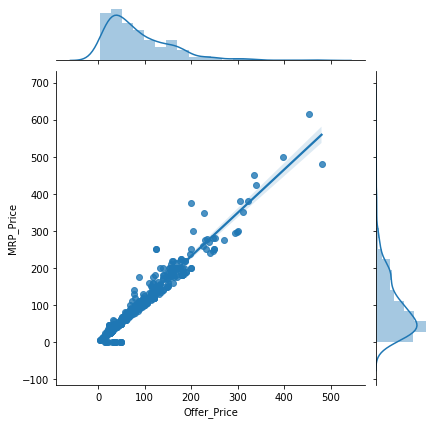

In [164]:
sns.jointplot(x='Offer_Price',y='MRP_Price',kind='reg',data=result)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014DC9A9E148>,
      dtype=object)

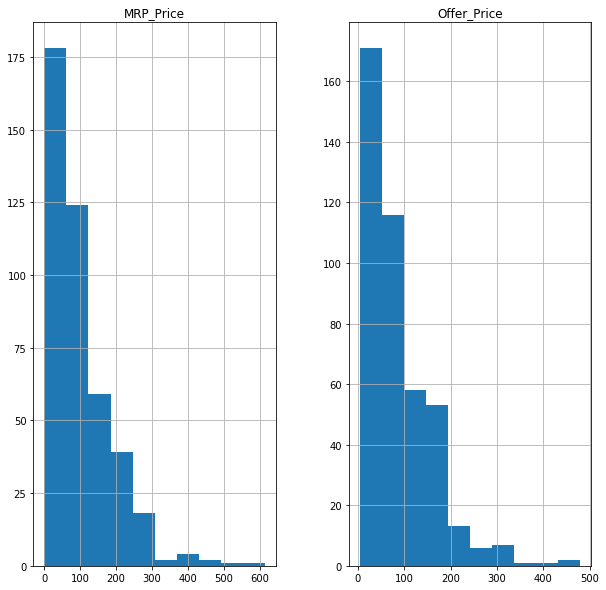

In [165]:
# checking the frequency distribution
result.hist(figsize=(10,10))

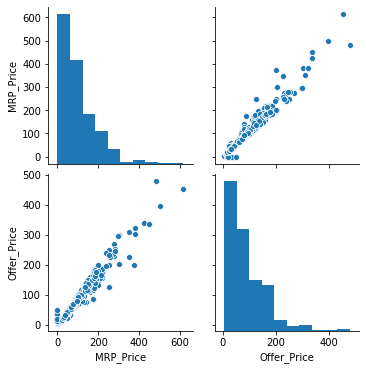

In [166]:
# for each pair of features in the dataset, we can visualize scatter plot
sns.pairplot(result)

Detecting outliears

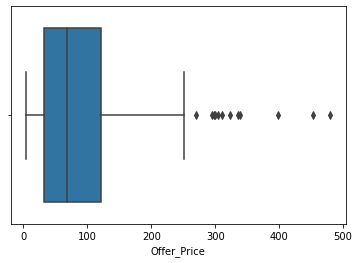

In [167]:
# finding outliears using box plot
sns.boxplot(x=result['Offer_Price'])

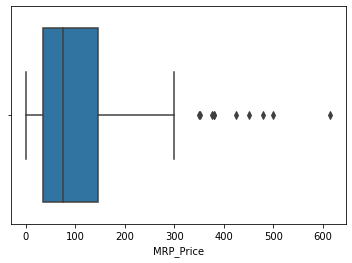

In [168]:
# finding outliears using box plot
sns.boxplot(x=result['MRP_Price'])

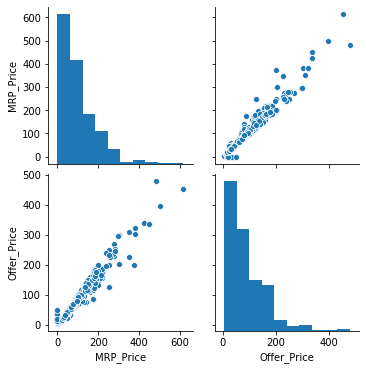

In [169]:
sns.pairplot(result)

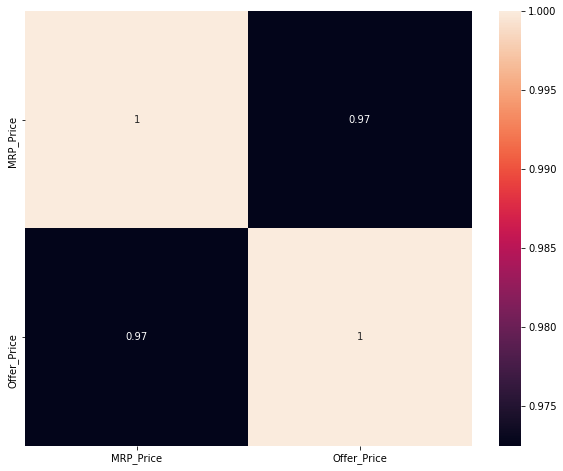

In [170]:
#Heatmap for all attributes
plt.figure(figsize = (10,8))
corr = result.corr()
sns.heatmap(corr, annot=True)
plt.show()

#### Inference: The above heat map shows there is a correlation between MRP_Price and Offer_Price.

In [171]:
#Check if there are any null values in the final dataset
result.isnull().sum()

Product_Name         0
Product_Quantity     0
MRP_Price            0
Offer_Price          0
Vendor               0
Category             0
Qty_Unit            62
dtype: int64

In [172]:
#Which shops are part of the dataset
result.Vendor.unique()

array(['BigBasket', 'JioMart', 'Dmart'], dtype=object)

In [173]:
#Unique product categories
result.Product_Name.unique()

array(['Cabbage', 'Ridge Gourd/Beerakaya', 'Coriander Leaves/Kothimeera',
       'Mosambi - Economy', 'Muskmelon - Netted Small/Kharbuja',
       'Apple - Red Delicious/WashingtonRegular', 'Beetroot',
       'Cucumber - English/Kheera', 'Kiwi - Green', 'Methi/Menthi kura',
       'Papaya - Semi Ripe/Boppayi Pandu', 'Apple - Royal GalaRegular',
       'Grapes - Bangalore Blue with Seed/Draksha', 'Coccinia/Dondakaya',
       'Brinjal - Nagpur/Varikatri/Vankaya', 'Raw Mango',
       'Palak 100 g+Ladies Finger+Cucumber+Capsicum Green (500g Each)+Bottle Gourd 1Kg',
       'Palak 250g +Ladies Finger+Cucumber+Capsicum Green (500g Each) +Bottle Gourd 1kg',
       'Sweet Potato/Chilakada Dumpa',
       'Dates - Kimiawith Seed/Khajoora Pandu', 'Drumstick/Mulakada',
       'Orange - ImportedRegular/Narinja/Santra',
       'Orange - Imported/Narinja/Santra', 'Beans - Broad/Chikkudukaya',
       'Brinjal - PurpleLong/Sannvankaya', 'Curry Leaves/Karivepaku',
       'Mosambi/Battaiah Pandu', 'Tomato 

In [174]:
#Unique product categories
result.Category.unique()

array(['FruitsAndVegitables', 'DalsAndPulses', 'BiscuitsAndCookies',
       'BathAndHandWash'], dtype=object)

In [175]:
result['discount'] = (result.MRP_Price - result.Offer_Price) *100 / result.MRP_Price

In [176]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 88
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      428 non-null    object 
 1   Product_Quantity  428 non-null    object 
 2   MRP_Price         428 non-null    float64
 3   Offer_Price       428 non-null    float64
 4   Vendor            428 non-null    object 
 5   Category          428 non-null    object 
 6   Qty_Unit          366 non-null    object 
 7   discount          428 non-null    float64
dtypes: float64(3), object(5)
memory usage: 40.1+ KB


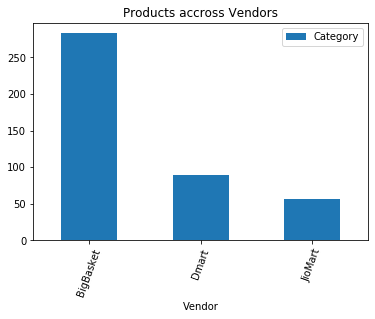

In [179]:
## How many products does each shop have to offer?
prods_shops_df = result[['Vendor','Category']]
prod_shops_counts =prods_shops_df.groupby(['Vendor'],as_index =False).count()
prod_shops_counts.plot.bar(x="Vendor", y="Category", rot=70, title="Products accross Vendors");

#### Inference: Big Basket has highest number of products available for the said categories  while Jiomart and amazon has the least. Customers are most likely to find a product in Big Basket.

Text(0, 0.5, 'Count')

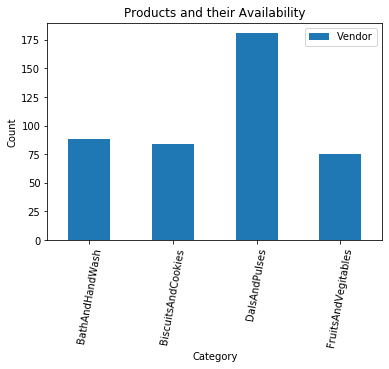

In [180]:
#How many products avaialble for each product category overall
products_count =prods_shops_df.groupby(['Category'],as_index =False).count()
dataFrame = pd.DataFrame(data=products_count);
y_pos = np.arange(len(dataFrame))
# Draw a vertical bar chart
ax = dataFrame.plot.bar(x="Category", y="Vendor", rot=80, title="Products and their Availability");
ax.set_xlabel("Category")
ax.set_ylabel("Count")


In [181]:
###  Number of products sold per product category by each shop 
pd.crosstab(result.Vendor, result.Category, margins=True, margins_name="Total",rownames=['Vendor']).T

Vendor,BigBasket,Dmart,JioMart,Total
Category,,,,
BathAndHandWash,73,0,15,88
BiscuitsAndCookies,64,0,20,84
DalsAndPulses,85,89,7,181
FruitsAndVegitables,61,0,14,75
Total,283,89,56,428


Text(0, 0.5, 'Category count with discount')

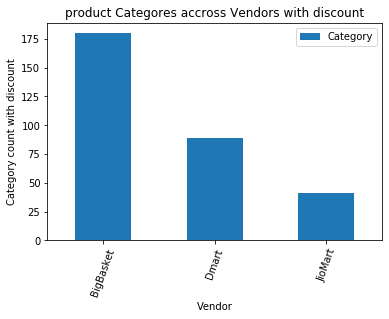

In [182]:
#  Which Individual Products  have Discount
discounts_df = result[ (result.discount > 0.0)]
  
discounts_shop_products = discounts_df[['Category','Vendor']]
discounts_per_shop =discounts_shop_products.groupby(['Vendor'],as_index =False).count()
ax = discounts_per_shop.plot.bar(x="Vendor", y="Category", rot=70, title="product Categores accross Vendors with discount");
ax.set_xlabel("Vendor")
ax.set_ylabel("Category count with discount") 

#### Inference: Big Basket offers the most discounts. So customers looking for discounts should visit Big Basket.

# Recommendation  

In [183]:
result.to_csv('combinedData.csv', index=False,encoding='utf-8')

In [184]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 88
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      428 non-null    object 
 1   Product_Quantity  428 non-null    object 
 2   MRP_Price         428 non-null    float64
 3   Offer_Price       428 non-null    float64
 4   Vendor            428 non-null    object 
 5   Category          428 non-null    object 
 6   Qty_Unit          366 non-null    object 
 7   discount          428 non-null    float64
dtypes: float64(3), object(5)
memory usage: 40.1+ KB


In [185]:
#Import necessary libraries for user interface
from ipywidgets import interact, Dropdown, HTML, Layout, Box, Label
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

#Read data into dataframe
df_combined = pd.read_csv("combinedData.csv")

#Unique product types that the user can buy
products_list = df_combined["Category"].unique()     

#Create dropdown widgets for the user to interact
product_type_dropdown = Dropdown(description="Product Category:", options = products_list)
product_names_dropdown = Dropdown(description="Product Name:")
product_sizes_dropdown = Dropdown(description="Size:")
recommendation_html = HTML(
    value=" ",
    placeholder='',
    description='',  layout={'width': 'max-content'}
)

box = Box(
    [
        Label(value='Recommendation:'),
        recommendation_html
    ]
) 
#Event handler when product category changes
def update_product_name_options(change):  
    product_type = product_type_dropdown.value         
    df_product = df_combined[  df_combined.Category.str.lower().str.contains(product_type.lower())    ]
    #print(df_product)
    products = df_product["Product_Name"].unique()
    #print(products)
    product_names_dropdown.options = products
product_type_dropdown.observe(update_product_name_options)
 
#Event handler when product name changes
def update_product_size_options(change): 
    if change['name'] == 'value' and (change['new'] != change['old']):
        product_type = product_type_dropdown.value
        product_name = product_names_dropdown.value
        df_product = df_combined[  df_combined.Category.str.lower().str.contains(product_type.lower())    ]
        #print(df_product)
        product_name = product_name.replace("+", "\+")
        df_product = df_product[  df_product.Product_Name.str.lower().str.contains(product_name.lower())   ] 
        product_sizes = df_product["Product_Quantity"].unique()
        product_sizes_dropdown.options = product_sizes
product_names_dropdown.observe(update_product_size_options)

#Event handler when product size changes
def recommend_product(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        product_type = product_type_dropdown.value
        product_name = product_names_dropdown.value
        product_size = product_sizes_dropdown.value
        recommendation_html.value= ""
        product_name = product_name.replace("+", "\+")
        if(product_size):
            df_final_list = df_combined[ df_combined.Category.str.lower().str.contains(product_type.lower()) & 
                                         df_combined.Product_Name.str.lower().str.contains(product_name.lower()) & 
                                         df_combined.Product_Quantity.str.lower().str.contains(product_size.lower()) ] 
            df_final_list.sort_values(by='Offer_Price', inplace=True)
            discount = df_final_list[ "discount"]
            #print('df_final_list:')
            #print(df_final_list)
            recommendation_html.value= "Buy it from <b>" + df_final_list.Vendor.iloc[0] + "</b> for Rs."  + str(df_final_list[ "Offer_Price"].iloc[0])  + " discount of " + str(df_final_list[ "discount"].iloc[0]) + "%" + " on MPR : " + str(df_final_list[ "MRP_Price"].iloc[0])
product_sizes_dropdown.observe(recommend_product)

#Display all user interface elements 
display(product_type_dropdown)
display(product_names_dropdown)
display(product_sizes_dropdown)
display(box)
update_product_name_options(None)
    

Dropdown(description='Product Category:', options=('FruitsAndVegitables', 'DalsAndPulses', 'BiscuitsAndCookies…

Dropdown(description='Product Name:', options=(), value=None)

Dropdown(description='Size:', options=(), value=None)

Box(children=(Label(value='Recommendation:'), HTML(value=' ', layout=Layout(width='max-content'), placeholder=…

Thank you! The End!